In [75]:
# Importar pandas y leer el CSV. Voy a usar os para definir el path para leer el archivo
import os
import pandas as pd
import numpy as np

os.chdir("/home/emanuel/Documents/Learning/DataScience-EBAC/Entregas/Entrega5/")
iris = pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [129]:
# Actividad 1
filtered_iris = iris[(iris["sepal.width"] >= 3.5) & (iris["sepal.length"] > 5)]
df_ind1 = filtered_iris.groupby("variety")["petal.width"].agg(media=np.mean, desviacion = np.std, mediana = lambda x: np.percentile(x,50) )
df_ind1

/tmp/ipykernel_166831/102581482.py:3: FutureWarning: The provided callable <function mean at 0x7aeefa766d40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ind1 = filtered_iris.groupby("variety")["petal.width"].agg(media=np.mean, desviacion = np.std, mediana = lambda x: np.percentile(x,50) )
/tmp/ipykernel_166831/102581482.py:3: FutureWarning: The provided callable <function std at 0x7aeefa766e80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_ind1 = filtered_iris.groupby("variety")["petal.width"].agg(media=np.mean, desviacion = np.std, mediana = lambda x: np.percentile(x,50) )


,media,desviacion,mediana
variety,,,
Setosa,0.270588,0.098518,0.2
Virginica,2.233333,0.251661,2.2


In [131]:
# Actividad 2
count_filtered = filtered_iris.shape[0]
count_filtered

20

In [137]:
grouped_stats = filtered_iris.groupby("variety")["petal.width"].agg(['mean', 'std']).reset_index()
filtered_iris_copy = filtered_iris.merge(grouped_stats, on='variety', how='left')
filtered_iris_copy['petal.width.st'] = (filtered_iris_copy['petal.width'] - filtered_iris_copy['mean']) / filtered_iris_copy['std']
final_result = filtered_iris_copy[['variety', 'petal.width', 'petal.width.st']]
final_result = filtered_iris_copy[['variety', 'petal.width.st']].rename(columns={
    'variety': 'Variedad',
    'petal.width.st': 'Ancho Est. Pétalo'
})
final_result

,Variedad,Ancho Est. Pétalo
0,Setosa,-0.716498
1,Setosa,1.313579
2,Setosa,-0.716498
3,Setosa,-0.716498
4,Setosa,1.313579
5,Setosa,1.313579
6,Setosa,0.298541
7,Setosa,0.298541
8,Setosa,0.298541
9,Setosa,1.313579


In [139]:
final_result.to_csv("Iris2.csv")

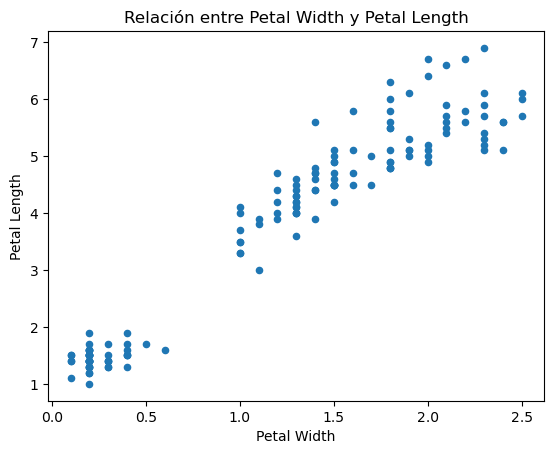

In [143]:
import matplotlib.pyplot as plt
iris.plot(x='petal.width', y='petal.length', kind='scatter', title='Relación entre Petal Width y Petal Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show()